In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

C:\Users\Manas\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('Alcohol_Sales.csv')

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [5]:
df.set_index('DATE', inplace=True)

In [6]:
df.rename(columns={'S4248SM144NCEN': 'Alcohol_Sales'}, inplace=True)

In [7]:
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]


In [8]:
model = ARIMA(train['Alcohol_Sales'], order=(1,1,1))  # You may need to adjust these parameters
fitted_model = model.fit()


C:\Users\Manas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Manas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Manas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
forecast = fitted_model.forecast(steps=len(test))

In [10]:
mse = mean_squared_error(test['Alcohol_Sales'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test['Alcohol_Sales'], forecast)

In [11]:
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Root Mean Squared Error: 2001.03
Mean Absolute Error: 1623.40


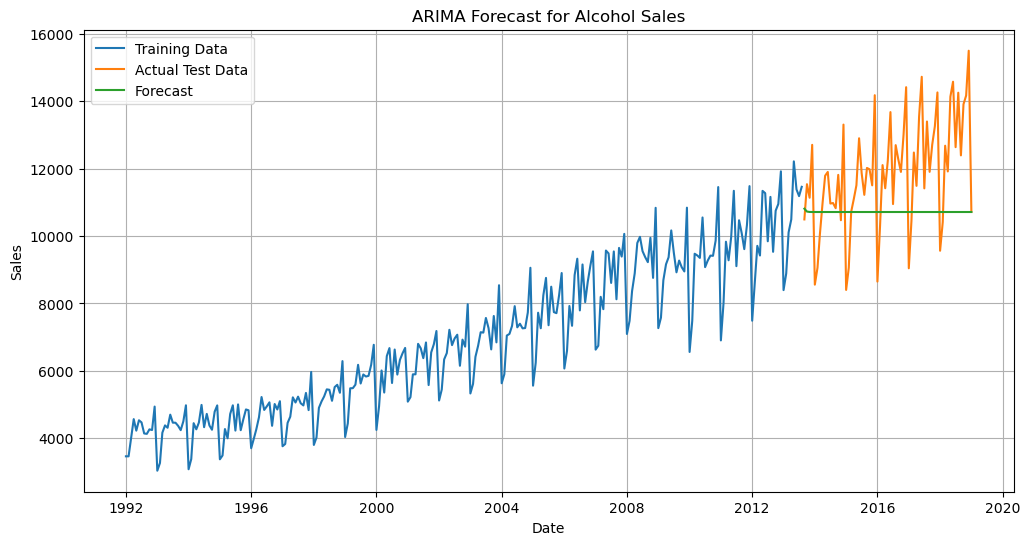

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Alcohol_Sales'], label='Training Data')
plt.plot(test.index, test['Alcohol_Sales'], label='Actual Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Forecast for Alcohol Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
future_steps = 12  # Forecast for the next 12 months
future_forecast = fitted_model.forecast(steps=future_steps)


In [14]:
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_steps, freq='M')

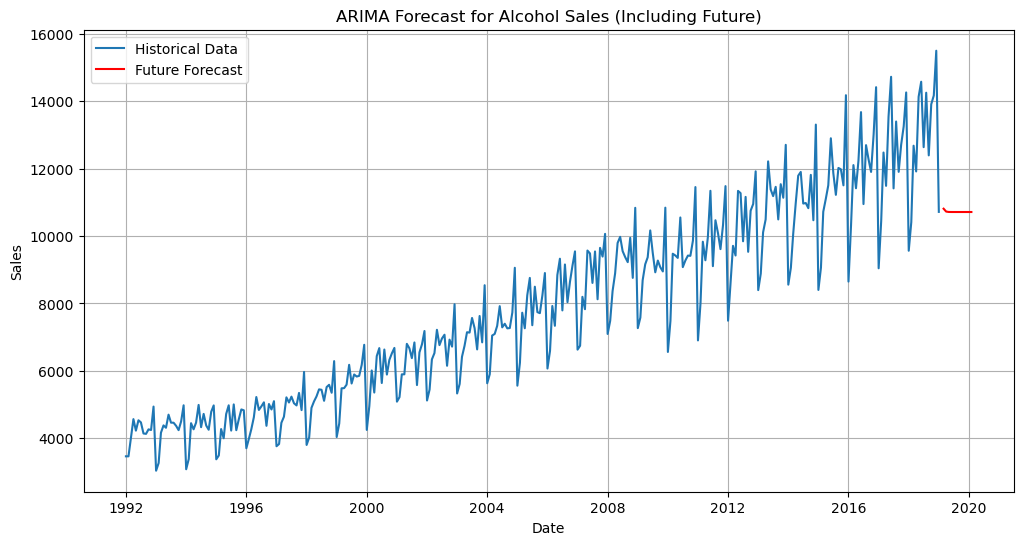

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Alcohol_Sales'], label='Historical Data')
plt.plot(future_dates, future_forecast, label='Future Forecast', color='red')
plt.title('ARIMA Forecast for Alcohol Sales (Including Future)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
print("\nFuture Forecast:")
for date, value in zip(future_dates, future_forecast):
    print(f"{date.strftime('%Y-%m')}: {value:.2f}")


Future Forecast:
2019-02: 10812.44
2019-03: 10727.16
2019-04: 10715.96
2019-05: 10714.49
2019-06: 10714.30
2019-07: 10714.27
2019-08: 10714.27
2019-09: 10714.27
2019-10: 10714.27
2019-11: 10714.27
2019-12: 10714.27
2020-01: 10714.27
